In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('games.csv')
# Extract the white rating and black rating fields
white_rating = df['white_rating']
black_rating = df['black_rating']
# Find the minimum and maximum values for each rating
min_white_rating = white_rating.min()
max_white_rating = white_rating.max()
min_black_rating = black_rating.min()
max_black_rating = black_rating.max()
# Calculate the range for each rating
range_white_rating = max_white_rating - min_white_rating
range_black_rating = max_black_rating - min_black_rating
# Print the ranges
print("Range of white rating:", range_white_rating)
print("Range of black rating:", range_black_rating)

Range of white rating: 1916
Range of black rating: 1934


In [3]:
# Calculate the mean of white rating
mean_white_rating = white_rating.mean()
# Calculate the mean of black rating
mean_black_rating = black_rating.mean()
# Print the means
print("Mean of white rating:", mean_white_rating)
print("Mean of black rating:", mean_black_rating)

Mean of white rating: 1596.6318675840064
Mean of black rating: 1588.8319872370128


In [4]:
# Calculate the median of white rating
median_white_rating = white_rating.median()

# Calculate the median of black rating
median_black_rating = black_rating.median()

# Print the medians
print("Median of white rating:", median_white_rating)
print("Median of black rating:", median_black_rating)

Median of white rating: 1567.0
Median of black rating: 1562.0


In [7]:
# Calculate the mode of white rating
mode_white_rating = white_rating.mode().values[0]

# Calculate the mode of black rating
mode_black_rating = black_rating.mode().values[0]

# Print the modes
print("Mode of white rating:", mode_white_rating)
print("Mode of black rating:", mode_black_rating)


Mode of white rating: 1500
Mode of black rating: 1500


In [9]:
# Calculate the quartiles for white rating
Q1_white_rating = white_rating.quantile(0.25)
Q3_white_rating = white_rating.quantile(0.75)

# Calculate the quartiles for black rating
Q1_black_rating = black_rating.quantile(0.25)
Q3_black_rating = black_rating.quantile(0.75)

# Print the quartiles
print("Q1 of white rating:", Q1_white_rating)
print("Q3 of white rating:", Q3_white_rating)
print("Q1 of black rating:", Q1_black_rating)
print("Q3 of black rating:", Q3_black_rating)

Q1 of white rating: 1398.0
Q3 of white rating: 1793.0
Q1 of black rating: 1391.0
Q3 of black rating: 1784.0


In [10]:
# Calculate the IQR for white rating and black rating
IQR_white_rating = Q3_white_rating - Q1_white_rating
IQR_black_rating = Q3_black_rating - Q1_black_rating
# Print the IQRs
print("Interquartile Range (IQR) of white rating:", IQR_white_rating)
print("Interquartile Range (IQR) of black rating:", IQR_black_rating)

Interquartile Range (IQR) of white rating: 395.0
Interquartile Range (IQR) of black rating: 393.0


In [11]:
# Calculate the sample variance for white rating
variance_white_rating = white_rating.var(ddof=1)

# Calculate the sample variance for black rating
variance_black_rating = black_rating.var(ddof=1)

# Calculate the sample standard deviation for white rating
std_deviation_white_rating = white_rating.std(ddof=1)

# Calculate the sample standard deviation for black rating
std_deviation_black_rating = black_rating.std(ddof=1)

# Print the sample variance and sample standard deviation
print("Variance of white rating:", variance_white_rating)
print("Variance of black rating:", variance_black_rating)
print("Standard Deviation of white rating:", std_deviation_white_rating)
print("Standard Deviation of black rating:", std_deviation_black_rating)


Variance of white rating: 84828.52887820943
Variance of black rating: 84702.02661400114
Standard Deviation of white rating: 291.25337573701944
Standard Deviation of black rating: 291.03612596033696


In [12]:
# Define the threshold for outliers 
IQR_white = Q3_white_rating - Q1_white_rating
threshold_white = Q3_white_rating + 1.5 * IQR_white


IQR_black = Q3_black_rating - Q1_black_rating
threshold_black = Q3_black_rating + 1.5 * IQR_black

# Detect outliers for white rating
outliers_white_rating = white_rating[white_rating > threshold_white]

# Detect outliers for black rating
outliers_black_rating = black_rating[black_rating > threshold_black]

# Print the outliers
print("Outliers in white rating:")
print(outliers_white_rating)

print("\nOutliers in black rating:")
print(outliers_black_rating)

Outliers in white rating:
39       2449
43       2443
48       2436
49       2436
637      2422
         ... 
18407    2477
18414    2443
19016    2621
19235    2454
19614    2549
Name: white_rating, Length: 127, dtype: int64

Outliers in black rating:
636      2405
637      2386
756      2474
757      2477
759      2464
         ... 
18937    2417
18996    2540
19530    2447
19611    2475
20011    2401
Name: black_rating, Length: 85, dtype: int64


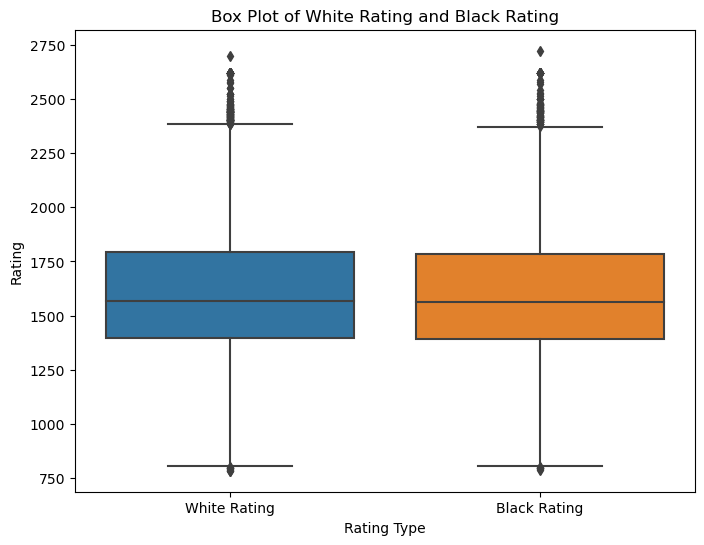

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the ratings
ratings_df = pd.DataFrame({'White Rating': white_rating, 'Black Rating': black_rating})

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=ratings_df)
plt.title('Box Plot of White Rating and Black Rating')
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.show()


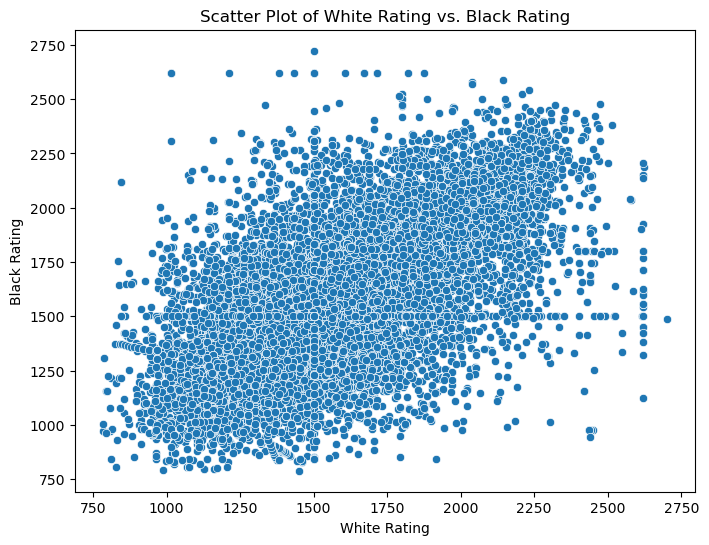

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=white_rating, y=black_rating)
plt.title('Scatter Plot of White Rating vs. Black Rating')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()


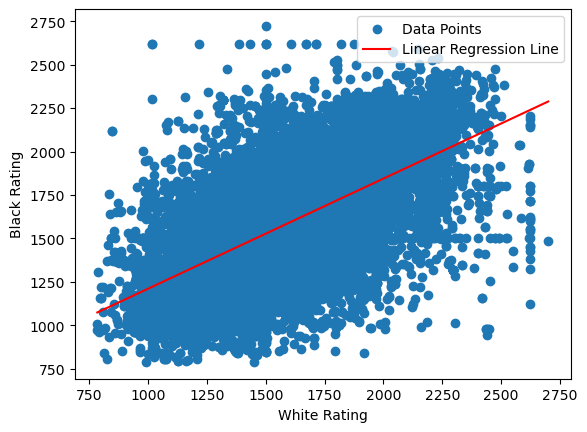

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Create a linear regression object
model = LinearRegression()

# Reshape the data as required by scikit-learn
X = white_rating.values.reshape(-1, 1)
y = black_rating.values.reshape(-1, 1)

# Fit the model to the data
model.fit(X, y)
# Generate points along the x-axis for plotting the line
x_line = np.linspace(X.min(), X.max(), 100)

# Predict the corresponding y-values using the linear regression model
y_line = model.predict(x_line.reshape(-1, 1))

# Create a scatter plot of the data points
plt.scatter(X, y, label='Data Points')

# Plot the linear regression line
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

# Add labels and a legend
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.legend()

# Show the plot
plt.show()


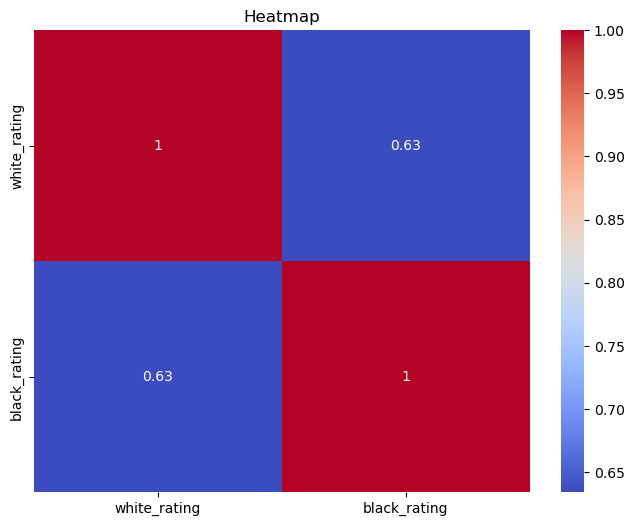

In [18]:
# Select the columns of interest for the heatmap
columns_of_interest = ['white_rating', 'black_rating']

# Create a correlation matrix
correlation_matrix = df[columns_of_interest].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()
